## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 2. Load Data

In [2]:
values = pd.read_csv("values.csv")
labels = pd.read_csv("labels.csv")

df = pd.concat([values, labels], axis=1)

print(df.head())
print(df.shape)
print(df.info())

  patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0

## 3. EDA

In [3]:
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())

       slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000     

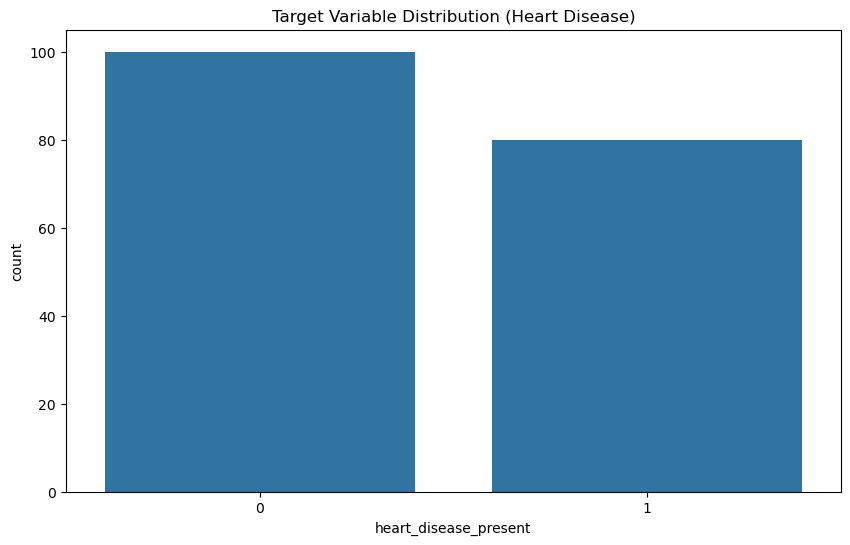

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="heart_disease_present")
plt.title("Target Variable Distribution (Heart Disease)")
plt.show()

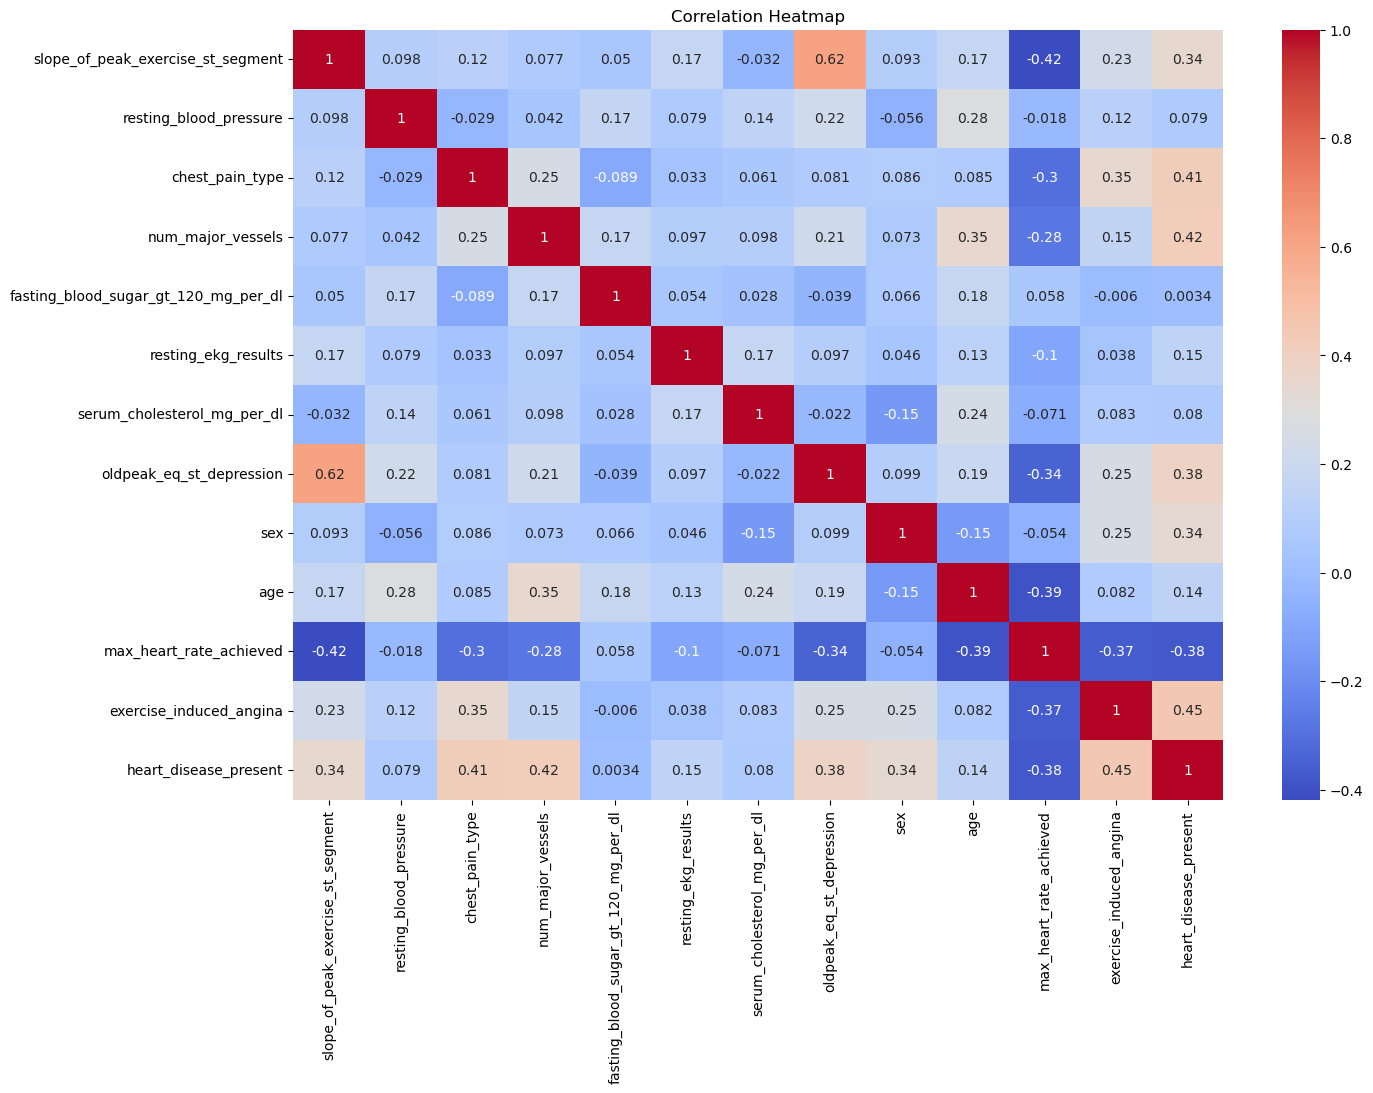

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

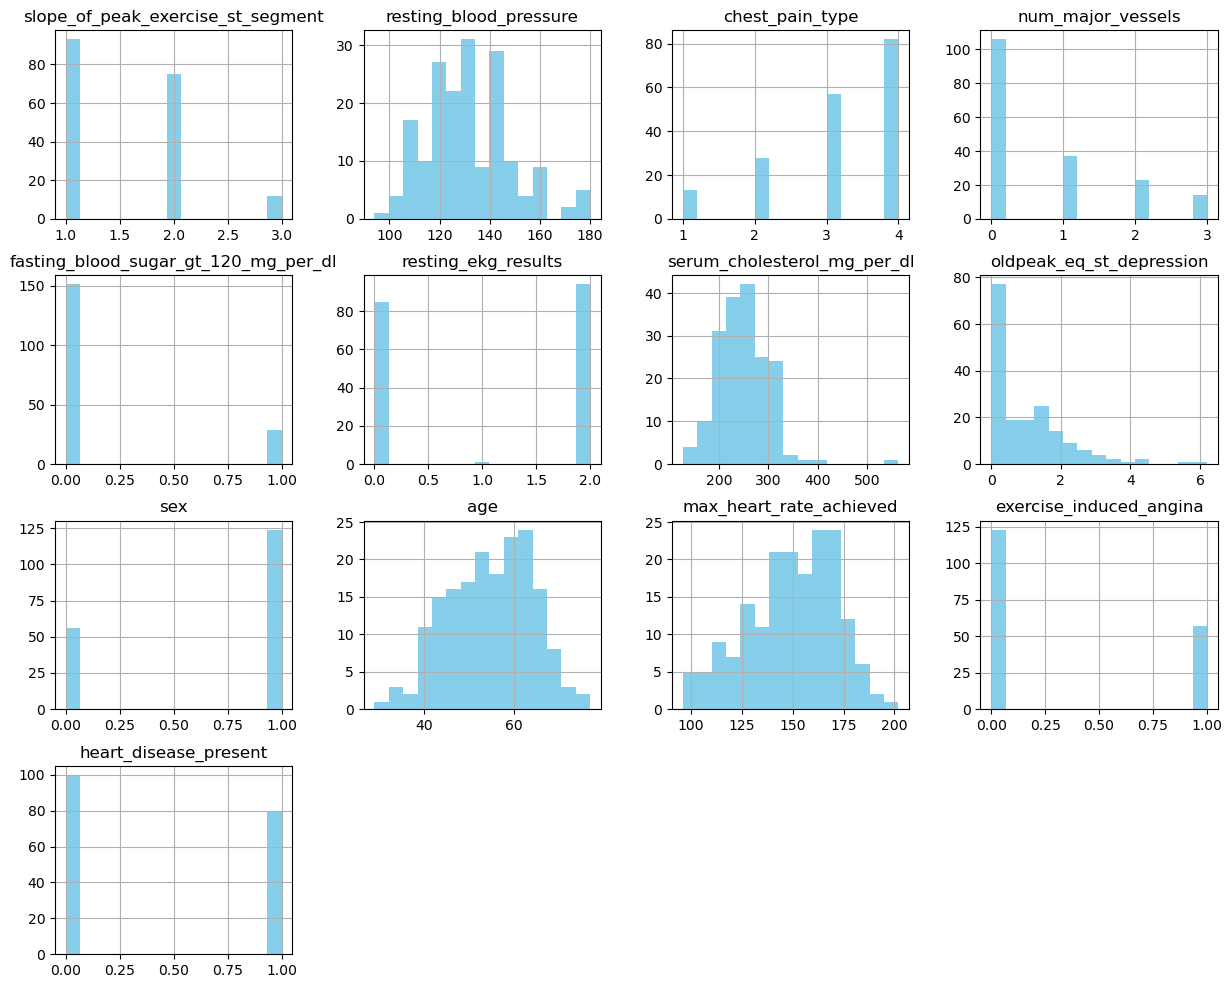

In [9]:
df.hist(figsize=(15,12), bins=15, color='skyblue')
plt.show()

In [24]:
total = len(df)
disease = df["heart_disease_present"].sum()
healthy = total - disease
male = df[df["sex"]==1].shape[0]
female = df[df["sex"]==0].shape[0]

print("===== HEART DISEASE DASHBOARD =====")
print(f"Total Patients: {total}")
print(f"Disease Cases: {disease} ({(disease/total)*100:.2f}%)")
print(f"Healthy Cases: {healthy} ({(healthy/total)*100:.2f}%)")
print(f"Male Patients: {male}")
print(f"Female Patients: {female}")

===== HEART DISEASE DASHBOARD =====
Total Patients: 180
Disease Cases: 80 (44.44%)
Healthy Cases: 100 (55.56%)
Male Patients: 124
Female Patients: 56


## 4. Preprocessing

In [17]:
df = df.copy()

# Convert 'thal' categorical to numeric
if "thal" in df.columns:
    le = LabelEncoder()
    df["thal"] = le.fit_transform(df["thal"])
x = df.drop(["heart_disease_present", "patient_id"], axis=1)
y = df["heart_disease_present"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)

## 5. Model Building

In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8333
Decision Tree Accuracy: 0.8056
Random Forest Accuracy: 0.8056
SVM Accuracy: 0.8611
KNN Accuracy: 0.8611


## 6. Model Comparison

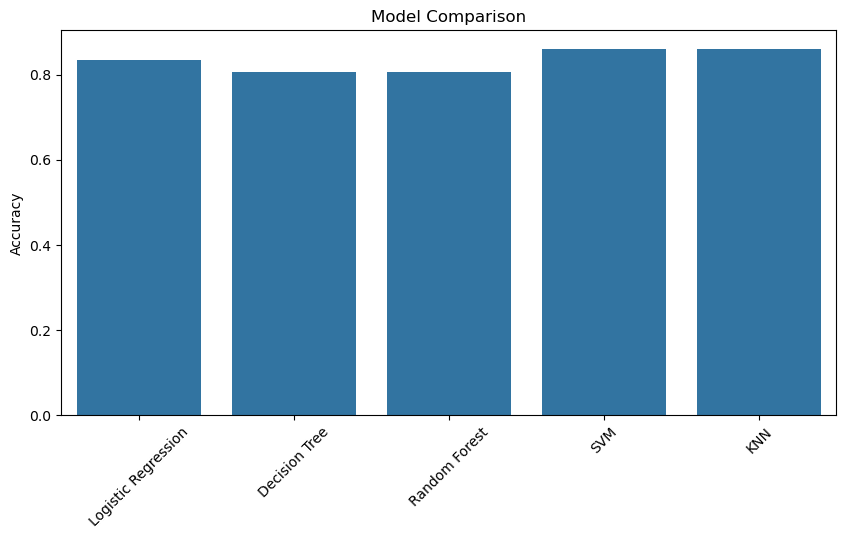

Model Comparison:

Logistic Regression: 0.8333
Decision Tree: 0.8056
Random Forest: 0.8056
SVM: 0.8611
KNN: 0.8611


In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

print("Model Comparison:\n")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

## 7. Final Best Model


Best Model: SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36


Confusion Matrix:


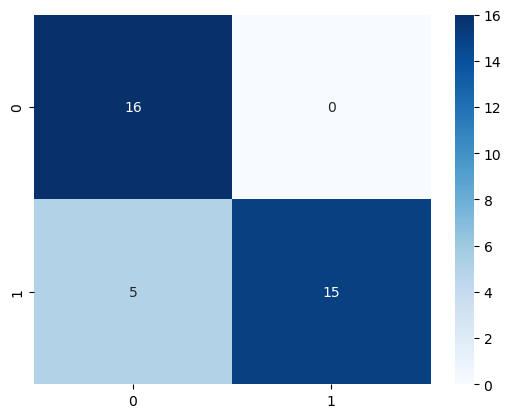

In [21]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.show()

## 8. Suggestions & Challenges

In [22]:
print("Suggestions to Hospital:\n")
print("""
1. Regular Screening:
   - Conduct routine ECG, blood pressure, cholesterol tests for at-risk patients.

2. Lifestyle Monitoring:
   - Recommend fitness tracking for heart rate, stress, and physical activity levels.

3. Early Alerts:
   - Use the ML model to identify high-risk patients early and schedule follow-up tests.

4. Awareness Programs:
   - Educate patients about hypertension, diabetes, cholesterol levels, and smoking risks.

5. Personalized Care Plans:
   - Provide tailored diet and exercise recommendations based on risk category.
""")

print("\nChallenges Faced & Techniques Used:\n")
print("""
1. Missing or noisy data:
   - Checked for missing values and removed inconsistencies.
   - Scaled numerical features for better model performance.

2. Categorical variables:
   - Used Label Encoding for 'thal'.

3. Imbalanced target classes:
   - Verified distribution; if highly imbalanced, consider SMOTE/resampling.

4. Model selection:
   - Tested multiple algorithms and compared performance metrics.

5. Interpretation:
   - Used confusion matrix & classification report for better diagnostic insights.
""")

Suggestions to Hospital:


1. Regular Screening:
   - Conduct routine ECG, blood pressure, cholesterol tests for at-risk patients.

2. Lifestyle Monitoring:
   - Recommend fitness tracking for heart rate, stress, and physical activity levels.

3. Early Alerts:
   - Use the ML model to identify high-risk patients early and schedule follow-up tests.

4. Awareness Programs:
   - Educate patients about hypertension, diabetes, cholesterol levels, and smoking risks.

5. Personalized Care Plans:
   - Provide tailored diet and exercise recommendations based on risk category.


Challenges Faced & Techniques Used:


1. Missing or noisy data:
   - Checked for missing values and removed inconsistencies.
   - Scaled numerical features for better model performance.

2. Categorical variables:
   - Used Label Encoding for 'thal'.

3. Imbalanced target classes:
   - Verified distribution; if highly imbalanced, consider SMOTE/resampling.

4. Model selection:
   - Tested multiple algorithms and compared 